
## Redes Neuronales


<p style='text-align: justify;'>Se creara una red de neuronas, sin utilizar las librerias de uso comun como tensorflow para apreciar conceptos importantes como el <strong>feed forward</strong> y el <strong>backward propagation</strong>.</p>
    


<p>A continuacion se muestra una tabla de verdad, que se utilizara como referencia para modelar </p>

| A 	| B 	| C 	| Y 	|
|:--:	|:--:	|:--:	|:-:	|
|  0 	|  0 	|  0 	| 1 	|
|  0 	|  0 	|  1 	| 0 	|
| 0  	| 1  	| 0  	| 0 	|
| 0  	| 1  	| 1  	| 1 	|
| 1  	| 0  	| 0  	| 0 	|
| 1  	| 0  	| 1  	| 1 	|
|  1 	|  1 	|  0 	| 1 	|
| 1  	| 1  	| 1  	| 0 	|

<p style='text-align: justify;'>En la tabla anterior se muestra que en la primera entrada donde todos los bits son cero, la salida es uno pero en la última entrada donde todos los bits son uno, la salida es cero. Cuando tenemos una cantidad par de ceros se asignará una salida de cero y en caso contrario se asigna una salida de uno. La red neuronal que verás a continuación funcionará de manera similar.</p> 

<center><img src="Figures/NN.png" width = "40%"></center>

Definimos las librerias ha utilizar y las matrices de entradas y salidas

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from numpy.random import seed
seed(30) 

In [2]:
# Arreglos de entrenamiento.
X = np.array(([0,0,0],
              [0,0,1],
              [0,1,0],
              [0,1,1],
              [1,0,0],
              [1,0,1],
              [1,1,0],
              [1,1,1]), dtype = float)

y = np.array(([1],
              [0],
              [0],
              [1],
              [0],
              [1],
              [1],
              [0]), dtype = float)


Definimos la tasa de aprendizaje ha utilizar junto con los pesos y bias.

In [3]:
lr = 0.9
w0 = np.random.randn(X.shape[1],6)
w1 = np.random.randn(6,1)
b0 = np.random.randn(1,6)
b1 = np.random.randn(1,1)
output = np.zeros(y.shape)
Z0,z1,a0,a1,a2,errors = [],[],[],[],[],[]

Podemos inspeccionar los pesos que van hasta la capa oculta y uno en una posicion particular.

In [4]:
 print("Los pesos que van hasta la capa oculta son : {} \n\n El peso en la posicion (2,3) es : {}".format(w0,w0[2,3]))

Los pesos que van hasta la capa oculta son : [[-1.26405266  1.52790535 -0.97071094  0.47055962 -0.10069672  0.30379318]
 [-1.72596243  1.58509537  0.13429659 -1.10685547  1.57822555  0.10749794]
 [-0.76404783 -0.77518851  1.38384717  0.76038508 -0.28564551  0.53836748]] 

 El peso en la posicion (2,3) es : 0.7603850849562862


## Funcion de activacion: 

Utilizaremos la funcion sigmoide que genera buenos resultados.


<center><img src="Figures/FuncionActivacion.png" width = "60%"></center>

In [5]:
def sigmoid(t):
    return 1/(1+np.exp(-t))


def sigmoid_derivative(p):
    return sigmoid(p) * sigmoid(1 - p)

## Feed forward

<center><img src="Figures/ForwardPropagation.png" width = "80%"></center>

In [6]:
def feedforward(X_input):
    
    global a0,z0,a1,z1,a2
    a0 = X_input
    z0 = np.dot(a0,w0) + b0
    a1 = sigmoid(z0)
    z1 = np.dot(a1,w1) + b1
    a2 = sigmoid(z1)
    output = a2
    
    return output

## Backward propagation

Definimos el backward propagation que calcula error mediante un decenso de gradiente, en otras palabras toma una estimacion diferenciando los puntos establecidos con los puntos estimados.

In [7]:
def backprop():

    global w0,w1,w2,b0,b1,b2
    
    mse = np.sum( (1 / 2) * (y - output) * (y - output))
    errors.append(mse)
    
    delta1 = -(y - output) * sigmoid_derivative(z1)
    d_w1 = np.dot(a1.T,delta1)
    d_b1 = delta1
    
    delta0 = np.dot(delta1,w1.T) * sigmoid_derivative(z0)
    d_w0 = np.dot(a0.T,delta0)
    d_b0 = delta0

    w1 = w1 - lr * d_w1
    w0 = w0 - lr * d_w0
    
    b1 = b1 - lr * d_b1.mean(axis=0).reshape(b1.shape)
    b0 = b0 - lr * d_b0.mean(axis=0).reshape(b0.shape)

## Sesion de entrenamiento

In [8]:
repeticiones = 5000

for i in range(repeticiones):
    output = feedforward(X)
    backprop()

    if i % 10 == 0:
        print("Epoch: {}, mse: {}".format(i,errors[-1]))

Epoch: 0, mse: 1.0704374495623776
Epoch: 10, mse: 0.9969725142813595
Epoch: 20, mse: 0.9935099221615411
Epoch: 30, mse: 0.9892624533767602
Epoch: 40, mse: 0.9837200149205059
Epoch: 50, mse: 0.9762844759723415
Epoch: 60, mse: 0.9662343473203006
Epoch: 70, mse: 0.9526333068533805
Epoch: 80, mse: 0.933920188952399
Epoch: 90, mse: 0.9070518770168914
Epoch: 100, mse: 0.8663172535085273
Epoch: 110, mse: 0.8035924222969753
Epoch: 120, mse: 0.715920163851269
Epoch: 130, mse: 0.6162711272114241
Epoch: 140, mse: 0.5240505983539437
Epoch: 150, mse: 0.4454305984668845
Epoch: 160, mse: 0.3667159868769713
Epoch: 170, mse: 0.2770414931779961
Epoch: 180, mse: 0.21281279355756877
Epoch: 190, mse: 0.16802165242960088
Epoch: 200, mse: 0.13431712130752707
Epoch: 210, mse: 0.10895726554750411
Epoch: 220, mse: 0.08986421044234917
Epoch: 230, mse: 0.07535456808398341
Epoch: 240, mse: 0.06417089877755361
Epoch: 250, mse: 0.0554126574270723
Epoch: 260, mse: 0.04844348464454915
Epoch: 270, mse: 0.04281297279837

Esto esta acualizando los pesos, alamacenando en las matrices definidas al comienzo.

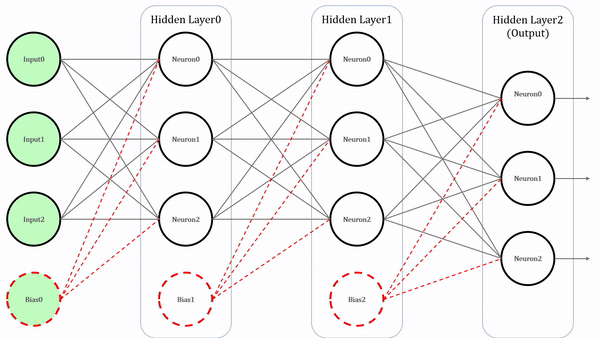

## Haciendo predicciones 


Entrada propuesta $x = [1,0,1]$
<br>Salida esperada $y=1$ (Debido a que tiene un número impar de ceros).

In [9]:
feedforward([1,0,1])


array([[0.99725101]])

Entrada propuesta $x = [0,0,1]$
<br>Salida esperada $y=0$ (Debido a que tiene un número par de ceros).

In [10]:
feedforward([0,0,1])

array([[0.00760527]])

Recuerda que esto es una predicción, y, si nuestra red está funcionando bien, nos habrá dado como resultado un número muy cercano al 1 o muy cercano al 0 dependiendo de nuestras entradas.

## Errores durante la prediccion

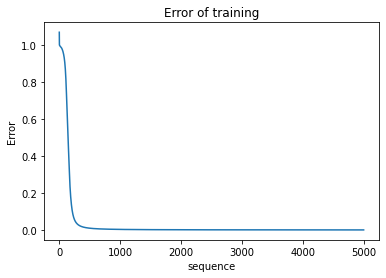

In [11]:
import matplotlib as mpl
import matplotlib.pyplot as plt

e = np.array(errors)
x1 = np.linspace(0, repeticiones, num=e.shape[0])


plt.plot(x1,e)

plt.title('Error of training')
plt.ylabel('Error')
plt.xlabel('sequence')

plt.show()

Como podemos ver despues de las 1000 Epoch ya el error tiende a 0, siendo suficiente 2000 epoch